In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
import numpy as np
from datetime import date

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
today = date.today()

In [3]:
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'

In [4]:
urlretrieve(url,'covid_19_geo_dist.xlsx')

('covid_19_geo_dist.xlsx', <http.client.HTTPMessage at 0x1a1960b5f8>)

In [5]:
df = pd.read_excel('covid_19_geo_dist.xlsx',parse_dates=['dateRep'])
df.dropna(axis=0,inplace=True)

In [6]:
cases_1000 = df[df['cases'] >= 1000].reset_index()
cases_1000.sample(5)

,index,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
61,3128,2020-03-30,30,3,2020,2599,292,France,FR,FRA,6.698724e+07
232,9188,2020-04-08,8,4,2020,30613,1906,United_States_of_America,US,USA,3.271674e+08
124,4223,2020-03-08,8,3,2020,1076,21,Iran,IR,IRN,8.180027e+07
29,1894,2020-02-19,19,2,2020,1750,139,China,CN,CHN,1.392730e+09
145,4622,2020-03-21,21,3,2020,5986,625,Italy,IT,ITA,6.043128e+07


### Countries with cases greater than 1000

In [7]:
countries_1000 = cases_1000.groupby(cases_1000['countriesAndTerritories'])['deaths','cases'].sum()
y = countries_1000.index
x = countries_1000.cases

Text(0.5, 1.0, 'Countries with the most cases')

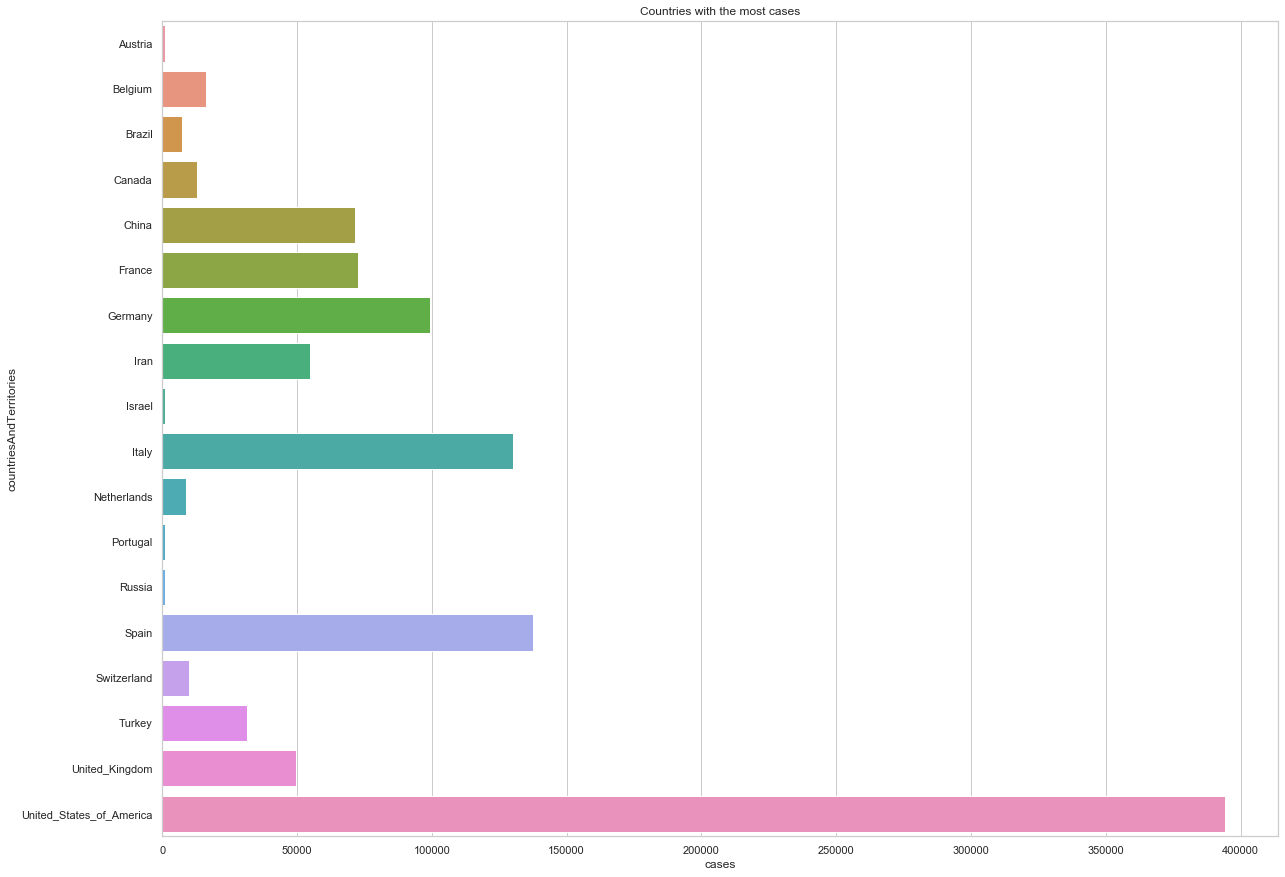

In [8]:
plt.figure(figsize = (20,15))
sns.barplot(x=countries_1000.cases,y=countries_1000.index)
plt.title('Countries with the most cases')

Text(0.5, 1.0, 'Countries with the most deaths')

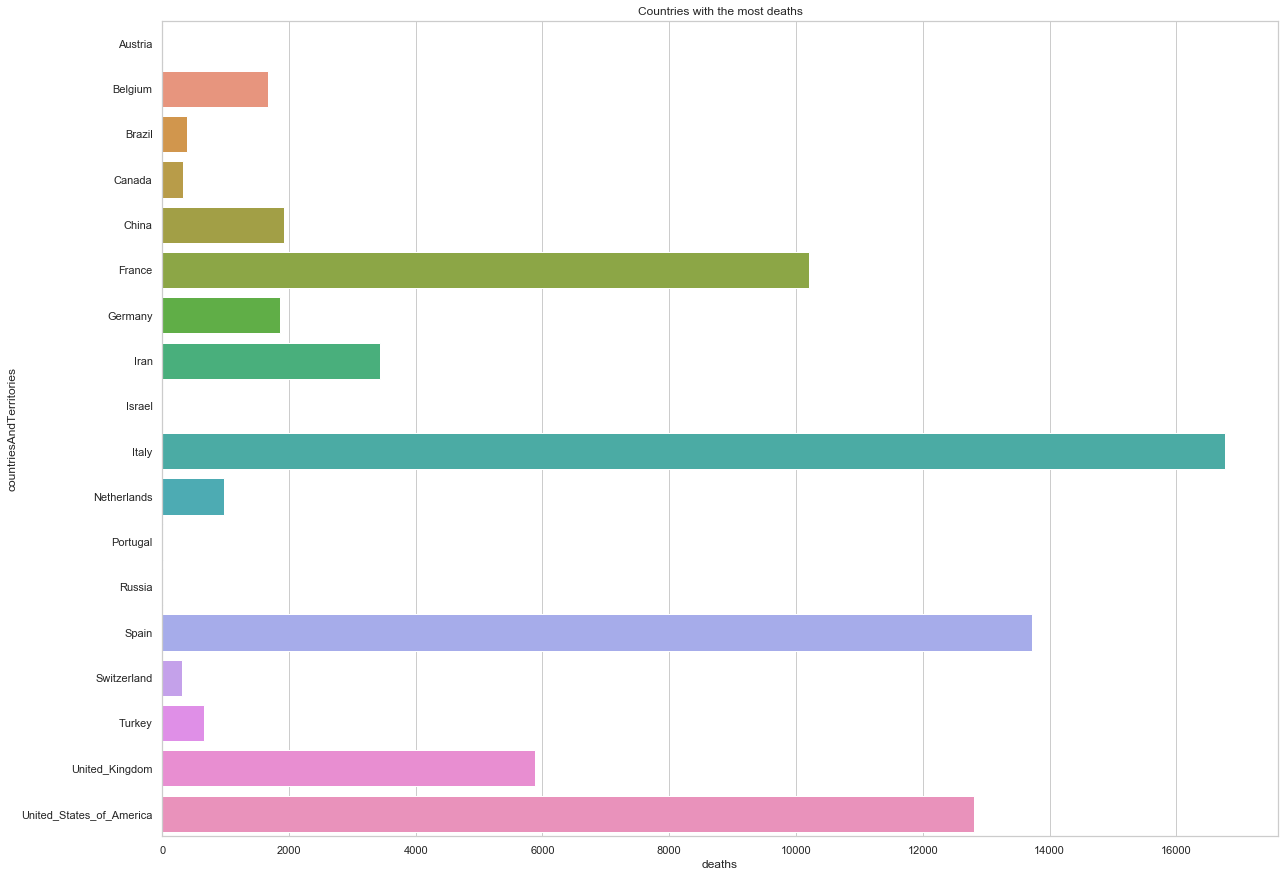

In [9]:
plt.figure(figsize = (20,15))
sns.barplot(x=countries_1000.deaths,y=countries_1000.index)
plt.title('Countries with the most deaths')

# Rate of infection = K × (the number of infections)/(the number of population)

In [48]:
# World Population as of 2019
pop = 7.75 * 1000000000

In [49]:
df2 = df.groupby(df.dateRep)['cases','deaths'].sum()


In [50]:
df2['pop'] = pop - df2.deaths.shift()
#df2['total_cases'] = df2['cases'].cumsum()
#df2['total_deaths'] = df2['deaths'].cumsum()
df2.dropna(inplace=True)

In [51]:
df2['pop'] = df2['pop'].apply(lambda x : ((x+2.5)-1))

In [87]:
df2['infection_rate_%'] = ((df2['cases']/df2['pop'])*100)
df2['mortality_rate_%'] = ((df2['deaths']/df2['pop'])*100)

In [53]:
def normalise_col(data):
    if data < 0.01:
        return data * 1000
    elif data < 0.1:
        return data * 100
    else:
        return data * 10

In [54]:
#df2['infection_rate_%'] = df2['infection_rate_%'].apply(normalise_col)
#df2['mortality_rate_%'] = df2['mortality_rate_%'].apply(normalise_col)

In [88]:
df2.tail(10)

,cases,deaths,pop,infection_rate_%,mortality_rate_%
dateRep,,,,,
2020-03-30,58315,3120,7.749997e+09,0.000752,0.000040
2020-03-31,61602,3690,7.749997e+09,0.000795,0.000048
2020-04-01,73899,4610,7.749996e+09,0.000954,0.000059
2020-04-02,76861,4987,7.749995e+09,0.000992,0.000064
2020-04-03,77173,4684,7.749995e+09,0.000996,0.000060
2020-04-04,81380,6577,7.749995e+09,0.001050,0.000085
2020-04-05,86424,6109,7.749993e+09,0.001115,0.000079
2020-04-06,71114,4647,7.749994e+09,0.000918,0.000060
2020-04-07,71155,5126,7.749995e+09,0.000918,0.000066


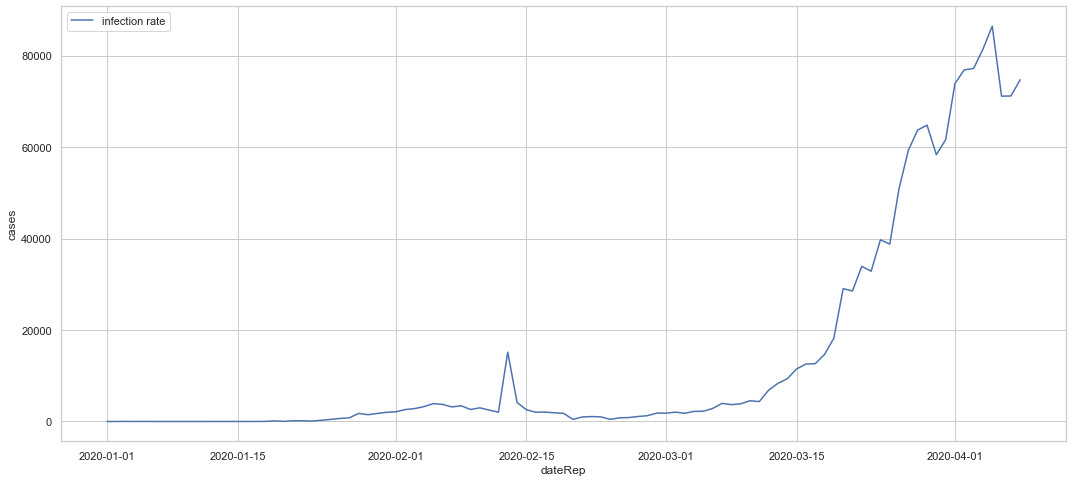

In [89]:
plt.figure(figsize=(18,8))
#sns.lineplot(x = df2.index, y = df2['infection_rate_%'])
sns.lineplot(x = df2.index, y = df2['cases'])
plt.legend(['infection rate','mortality rate'])

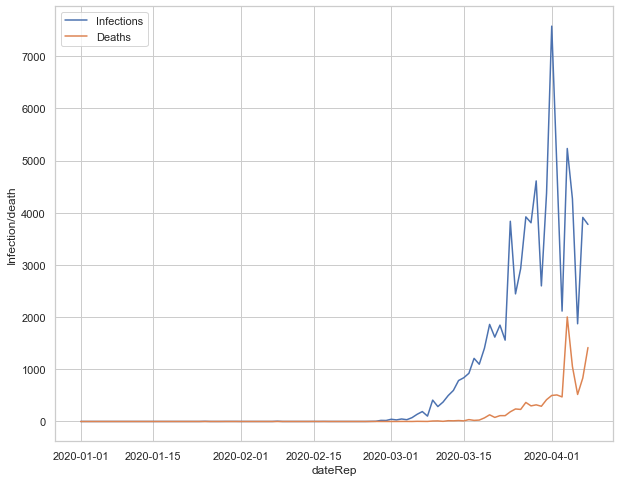

In [86]:
country = df[df.countriesAndTerritories == 'France']
country = country.groupby(country.dateRep)['cases','deaths'].sum()
country['total_cases'] = country.cases.cumsum()
country['total_deaths'] = country.deaths.cumsum()
country['pop'] = pop - country.deaths.shift()
country.dropna(inplace=True)
country['pop'] = country['pop'].apply(lambda x : ((x+2.5)-1))
country['infection_rate_%'] = ((country['total_cases']/country['pop'])*100)
country['mortality_rate_%'] = ((country['total_deaths']/country['pop'])*100)
plt.figure(figsize=(10,8))
sns.lineplot(x = country.index, y= country['cases'])
sns.lineplot(x = country.index, y= country['deaths'])
plt.ylabel('Infection/death')
plt.legend(['Infections','Deaths'])

### World Population Trend (Approximation)

Text(0.5, 1.0, 'Drop in population (approx)')

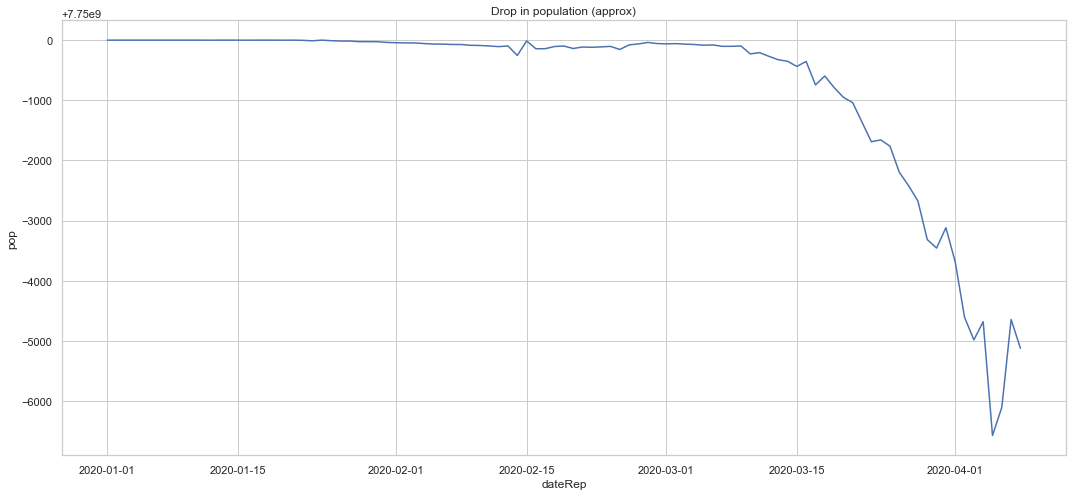

In [79]:
plt.figure(figsize=(18,8))
sns.lineplot(x = df2.index, y = df2['pop'])
plt.title('Drop in population (approx)')

In [26]:
print(url[-14:-5])
print(today)
print('There are {0} cases and {1} deaths as of today \nThere are {2} new cases today and {3} deaths were recorded today as well \nGod Save us all'
      .format(df2.total_cases[-1], df2.total_deaths[-1], df2.cases[-1], df2.deaths[-1]))

worldwide
2020-04-08
There are 1386120 cases and 81383 deaths as of today 
There are 74704 new cases today and 7402 deaths were recorded today as well 
God Save us all
